<a href="https://colab.research.google.com/github/Shirleycwj/pyrealm/blob/global/Pyrealm_global_run_protocol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulation Scheme

---


The 'pyrealm' python package simulate GPP based on the P model structure described in [Stocker et al. 2020](https://gmd.copernicus.org/articles/13/1545/2020/#section3). GPP is modelled using monthly climate and CO2 data, with account for soil moisture stress effect estimated using daily climate data and averaged to monthly soil moisture stress factor. The detailed simulation scheme is as follows:
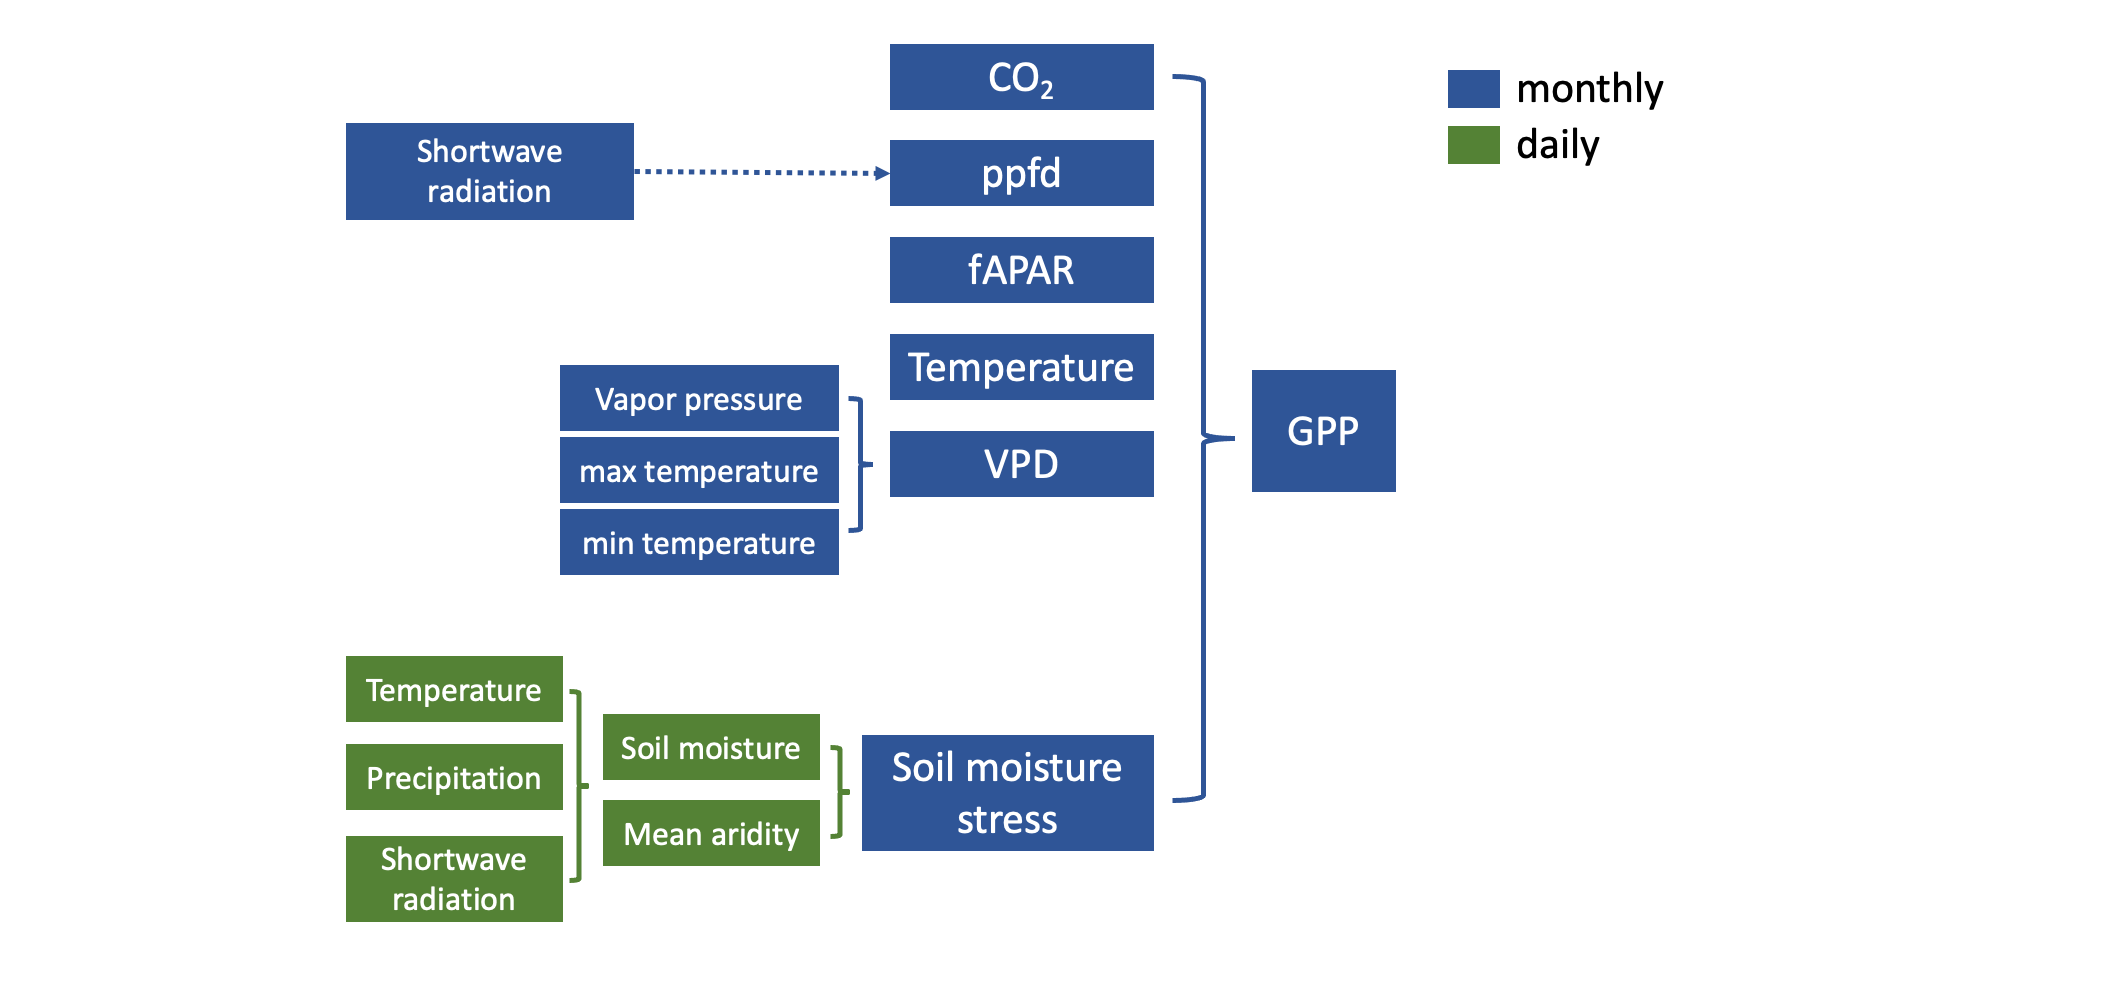
# Input Data

---


## CO2
- Source: [Mauna Loa Observatory, Hawaii](https://scrippsco2.ucsd.edu/data/atmospheric_co2/primary_mlo_co2_record.html)
- Periodicity: monthly seasonally adjusted filled CO2 from 1958 - present
- Unit: ppm
- Note: annual data available from NOAA ESRL

## Temperature/vapor pressure
- Source: (1) [CRU TS4.04](https://crudata.uea.ac.uk/cru/data/hrg/); (2) [WFDE5 'near surface air temperature' v1.1](https://cds.climate.copernicus.eu/cdsapp#!/dataset/10.24381/cds.20d54e34?tab=overview)
- Periodicity: (1) monthly daily mean (CRU) ; (2) hourly (WFDE5)
- Resolution: 0.5 degree
- Unit: degree celsius for CRU temperature, Kelvin for WFDE5 temperature, hPa for vapor pressure
- Note: 
  - mean, maximum and minimum monthly temperature correspond to tmp/tmx/tmn in uploaded data;
  - Two choices for temperature:
    - monthly daily mean temperature from CRU
    - monthly daytime temperature derived from WFDE5
- Calculation of vapor pressure deficit (VPD): vpd is calculated in unit kPa and then converted to Pa for P model simulation

$$ VPD_{min} = 0.611 \times exp(\frac{17.27 \times t_{min}}{t_{min}+237.3}) - 0.1 \times vap_{elev} $$
$$ VPD_{max} = 0.611 \times exp(\frac{17.27 \times t_{max}}{t_{max}+237.3}) - 0.1 \times vap_{elev} $$
$$ VPD = (VPD_{max} + VPD_{min})/2 $$

## ppfd
- Source: [WFDE5 'Surface downwelling shortwave radiation' v1.1](https://cds.climate.copernicus.eu/cdsapp#!/dataset/10.24381/cds.20d54e34?tab=overview)
- Periodicity: hourly [converted to monthly mean]
- Resolution: 0.5 degree
- Note: Since shortwave radiation is downloaded in the unit 'W/m2', it should be converted to 'kJ/m2/d' using 1 W/m2 = 86.4 KJ/m2/d before proceeding pyrealm, where furthered converted to ppfd by multiplying a constant kfFEC * (1.0e*-3). Value for kfFEC is 2.04 μmol/J, therefore unit for ppfd is 'mol/m2/d' and GPP unit is 'gC/m2/d'.
 
## elevation
- Source: [WFDEI](http://ftp//rfdata:forceDATA@ftp.iiasa.ac.at/WFDEI/)
- Resolution: 0.5 degree
 
## C4 percent
- [NASA DAAC](https://daac.ornl.gov/cgi-bin/dsviewer.pl?ds_id=932)
- Resolution: 0.5 degree

The global application of pyrealm package is available on [Github](https://github.com/Shirleycwj/pyrealm) with function to calculate VPD and prepare data for running pyrealm. For any question please contact Wenjia Cai (w.cai17@imperial.ac.uk).